In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/My\ Drive/Classification/assignment1/cs231n/datasets/
!bash get_datasets.sh
%cd /content

/content/drive/My Drive/Classification/assignment1/cs231n/datasets
--2020-12-21 18:39:45--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  58.2MB/s    in 2.8s    

2020-12-21 18:39:48 (58.2 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1
/content


In [2]:
import sys
sys.path.append('/content/drive/My Drive/Classification/assignment1')

# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [3]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [4]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()
print(X)
print(y)

[[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]
[0 1 2 2 1]


# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [5]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [6]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [7]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.017149607938732048


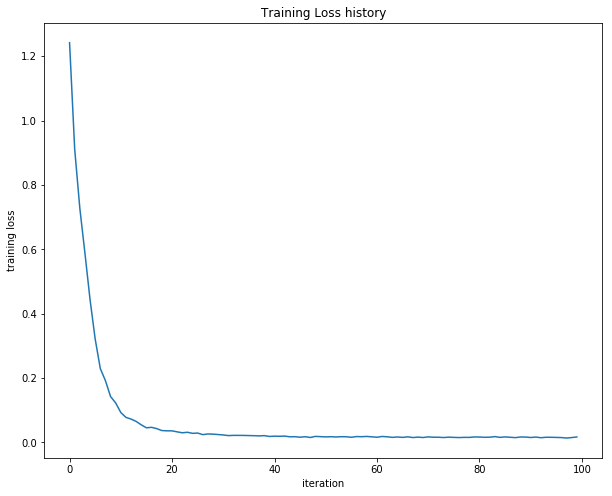

In [8]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [9]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '/content/drive/My Drive/Classification/assignment1/cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [10]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

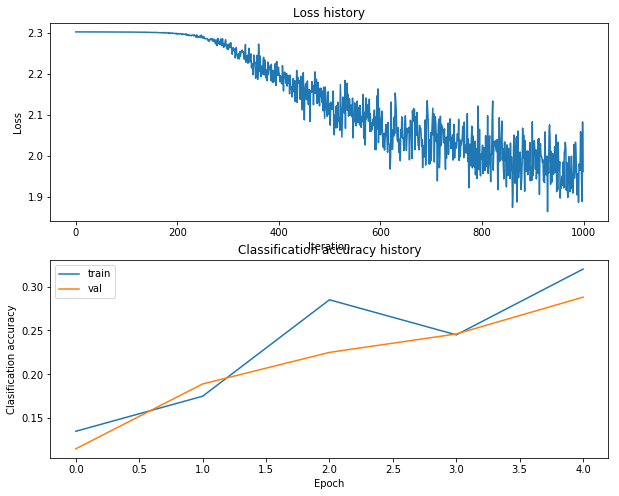

In [11]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

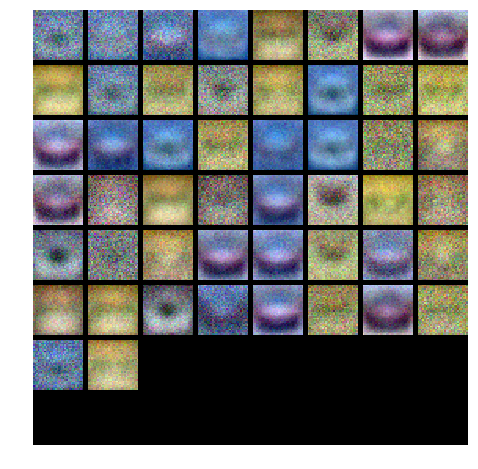

In [12]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

iteration 0 / 1000: loss 2.302606
iteration 100 / 1000: loss 2.302059
iteration 200 / 1000: loss 2.299063
iteration 300 / 1000: loss 2.258022
iteration 400 / 1000: loss 2.177133
iteration 500 / 1000: loss 2.120090
iteration 600 / 1000: loss 2.063805
iteration 700 / 1000: loss 2.078939
iteration 800 / 1000: loss 1.939167
iteration 900 / 1000: loss 2.088476


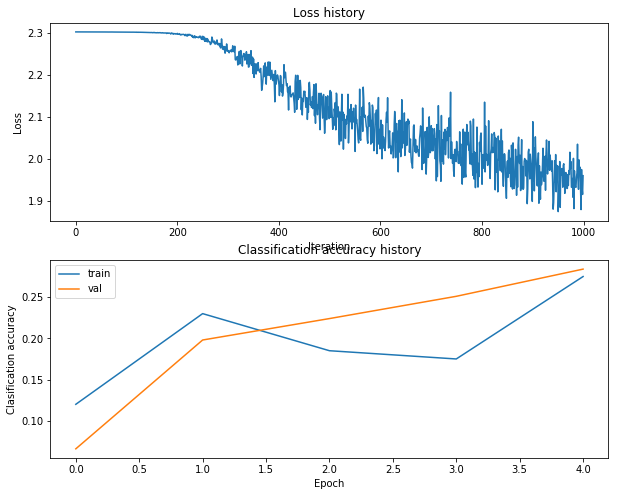

iteration 0 / 2000: loss 2.302563
iteration 100 / 2000: loss 2.301829
iteration 200 / 2000: loss 2.295501
iteration 300 / 2000: loss 2.258391
iteration 400 / 2000: loss 2.163290
iteration 500 / 2000: loss 2.135371
iteration 600 / 2000: loss 2.076019
iteration 700 / 2000: loss 2.015724
iteration 800 / 2000: loss 1.953976
iteration 900 / 2000: loss 1.896877
iteration 1000 / 2000: loss 1.988389
iteration 1100 / 2000: loss 1.966378
iteration 1200 / 2000: loss 1.890070
iteration 1300 / 2000: loss 1.776574
iteration 1400 / 2000: loss 1.880209
iteration 1500 / 2000: loss 1.906418
iteration 1600 / 2000: loss 1.793731
iteration 1700 / 2000: loss 1.741710
iteration 1800 / 2000: loss 1.792113
iteration 1900 / 2000: loss 1.756393


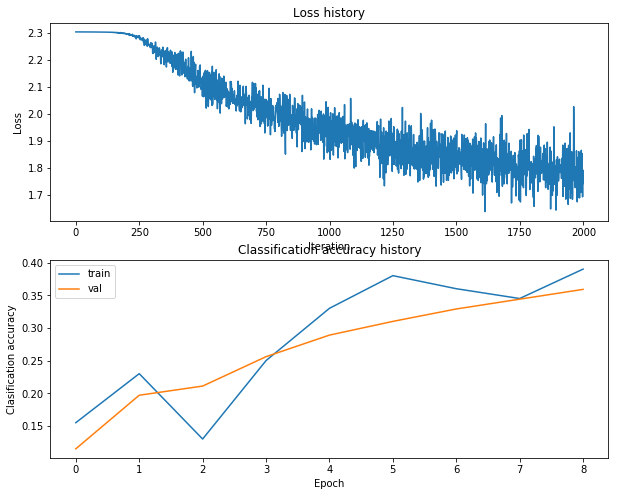

iteration 0 / 3000: loss 2.302549
iteration 100 / 3000: loss 2.302010
iteration 200 / 3000: loss 2.296775
iteration 300 / 3000: loss 2.256411
iteration 400 / 3000: loss 2.183340
iteration 500 / 3000: loss 2.099581
iteration 600 / 3000: loss 2.063426
iteration 700 / 3000: loss 2.038078
iteration 800 / 3000: loss 1.968733
iteration 900 / 3000: loss 1.887481
iteration 1000 / 3000: loss 1.899993
iteration 1100 / 3000: loss 1.985646
iteration 1200 / 3000: loss 1.941540
iteration 1300 / 3000: loss 1.867616
iteration 1400 / 3000: loss 1.849386
iteration 1500 / 3000: loss 1.788915
iteration 1600 / 3000: loss 1.710600
iteration 1700 / 3000: loss 1.760410
iteration 1800 / 3000: loss 1.822312
iteration 1900 / 3000: loss 1.753413
iteration 2000 / 3000: loss 1.759230
iteration 2100 / 3000: loss 1.766269
iteration 2200 / 3000: loss 1.697831
iteration 2300 / 3000: loss 1.774235
iteration 2400 / 3000: loss 1.756870
iteration 2500 / 3000: loss 1.696766
iteration 2600 / 3000: loss 1.780348
iteration 270

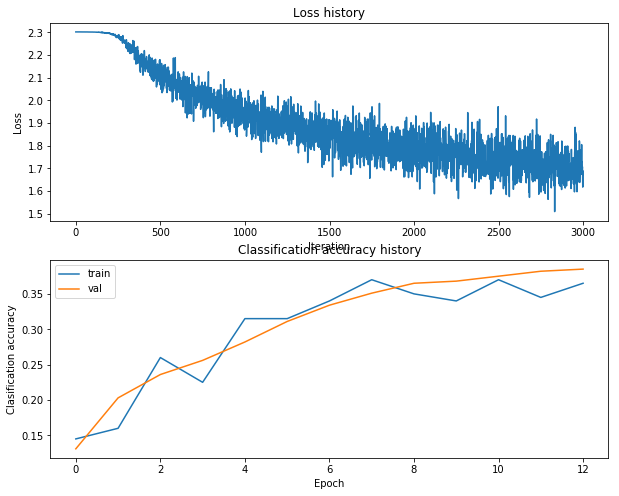

iteration 0 / 1000: loss 2.302647
iteration 100 / 1000: loss 2.302212
iteration 200 / 1000: loss 2.297912
iteration 300 / 1000: loss 2.262330
iteration 400 / 1000: loss 2.208277
iteration 500 / 1000: loss 2.105188
iteration 600 / 1000: loss 2.026518
iteration 700 / 1000: loss 2.079363
iteration 800 / 1000: loss 2.000006
iteration 900 / 1000: loss 1.949765


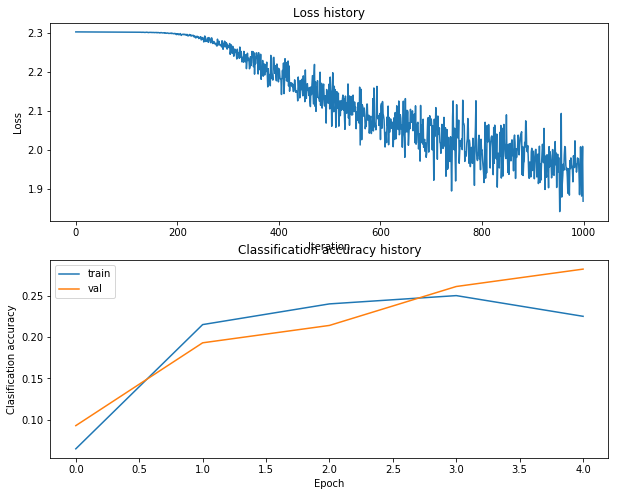

iteration 0 / 2000: loss 2.302610
iteration 100 / 2000: loss 2.302224
iteration 200 / 2000: loss 2.298547
iteration 300 / 2000: loss 2.273477
iteration 400 / 2000: loss 2.200896
iteration 500 / 2000: loss 2.108977
iteration 600 / 2000: loss 2.061259
iteration 700 / 2000: loss 2.040483
iteration 800 / 2000: loss 2.032082
iteration 900 / 2000: loss 1.858993
iteration 1000 / 2000: loss 1.922366
iteration 1100 / 2000: loss 1.966984
iteration 1200 / 2000: loss 1.824124
iteration 1300 / 2000: loss 1.989376
iteration 1400 / 2000: loss 1.894772
iteration 1500 / 2000: loss 1.899752
iteration 1600 / 2000: loss 1.810011
iteration 1700 / 2000: loss 1.875695
iteration 1800 / 2000: loss 1.729863
iteration 1900 / 2000: loss 1.812713


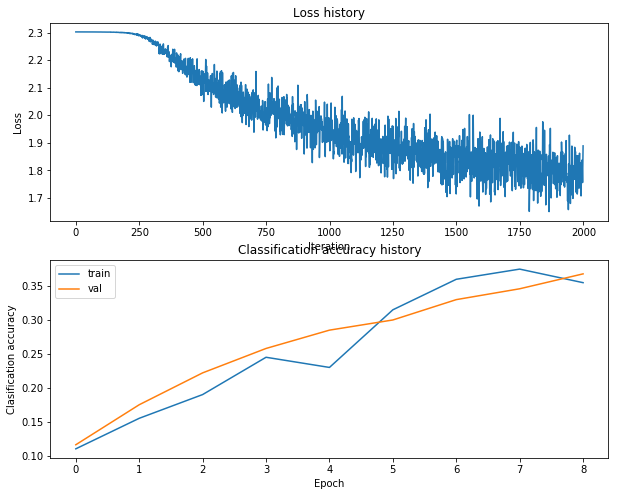

iteration 0 / 3000: loss 2.302593
iteration 100 / 3000: loss 2.301931
iteration 200 / 3000: loss 2.297021
iteration 300 / 3000: loss 2.258706
iteration 400 / 3000: loss 2.202042
iteration 500 / 3000: loss 2.124677
iteration 600 / 3000: loss 2.076996
iteration 700 / 3000: loss 2.002831
iteration 800 / 3000: loss 1.967991
iteration 900 / 3000: loss 1.890730
iteration 1000 / 3000: loss 1.906505
iteration 1100 / 3000: loss 1.968465
iteration 1200 / 3000: loss 1.867889
iteration 1300 / 3000: loss 1.912916
iteration 1400 / 3000: loss 1.852427
iteration 1500 / 3000: loss 1.740351
iteration 1600 / 3000: loss 1.798710
iteration 1700 / 3000: loss 1.868819
iteration 1800 / 3000: loss 1.629075
iteration 1900 / 3000: loss 1.762511
iteration 2000 / 3000: loss 1.729066
iteration 2100 / 3000: loss 1.787615
iteration 2200 / 3000: loss 1.812578
iteration 2300 / 3000: loss 1.750526
iteration 2400 / 3000: loss 1.812015
iteration 2500 / 3000: loss 1.779695
iteration 2600 / 3000: loss 1.806823
iteration 270

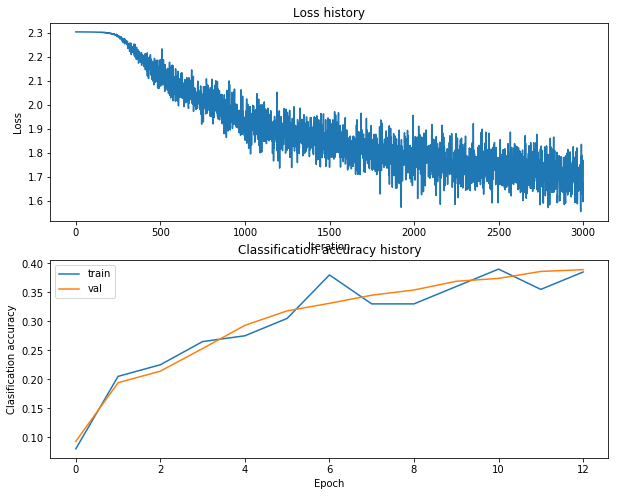

iteration 0 / 1000: loss 2.302794
iteration 100 / 1000: loss 2.302338
iteration 200 / 1000: loss 2.298573
iteration 300 / 1000: loss 2.278951
iteration 400 / 1000: loss 2.162289
iteration 500 / 1000: loss 2.119219
iteration 600 / 1000: loss 2.025389
iteration 700 / 1000: loss 1.992765
iteration 800 / 1000: loss 1.969111
iteration 900 / 1000: loss 2.006904


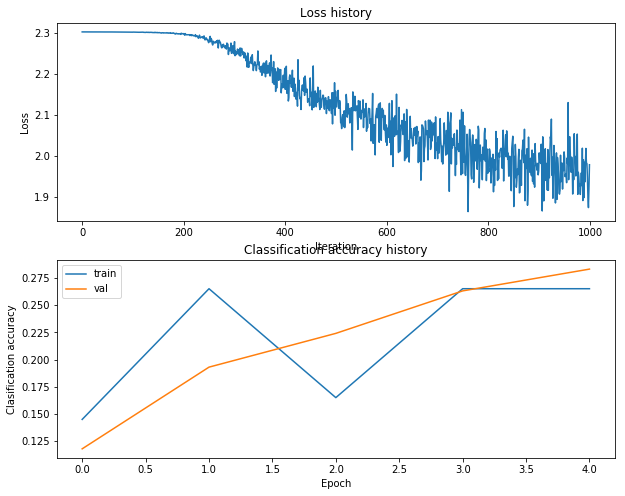

iteration 0 / 2000: loss 2.302789
iteration 100 / 2000: loss 2.302363
iteration 200 / 2000: loss 2.299658
iteration 300 / 2000: loss 2.266504
iteration 400 / 2000: loss 2.203589
iteration 500 / 2000: loss 2.134222
iteration 600 / 2000: loss 2.077805
iteration 700 / 2000: loss 1.967029
iteration 800 / 2000: loss 2.062655
iteration 900 / 2000: loss 2.002816
iteration 1000 / 2000: loss 1.936376
iteration 1100 / 2000: loss 1.910958
iteration 1200 / 2000: loss 1.853481
iteration 1300 / 2000: loss 1.828860
iteration 1400 / 2000: loss 1.897407
iteration 1500 / 2000: loss 1.793770
iteration 1600 / 2000: loss 1.797043
iteration 1700 / 2000: loss 1.820370
iteration 1800 / 2000: loss 1.841005
iteration 1900 / 2000: loss 1.819927


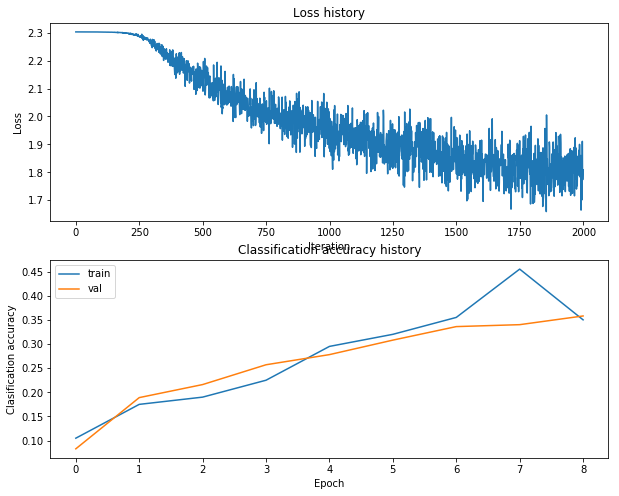

iteration 0 / 3000: loss 2.302776
iteration 100 / 3000: loss 2.302218
iteration 200 / 3000: loss 2.297212
iteration 300 / 3000: loss 2.241877
iteration 400 / 3000: loss 2.190921
iteration 500 / 3000: loss 2.180167
iteration 600 / 3000: loss 2.064469
iteration 700 / 3000: loss 2.055917
iteration 800 / 3000: loss 1.978569
iteration 900 / 3000: loss 1.999864
iteration 1000 / 3000: loss 1.895525
iteration 1100 / 3000: loss 1.959042
iteration 1200 / 3000: loss 1.871281
iteration 1300 / 3000: loss 1.911999
iteration 1400 / 3000: loss 1.848120
iteration 1500 / 3000: loss 1.755676
iteration 1600 / 3000: loss 1.850665
iteration 1700 / 3000: loss 1.930438
iteration 1800 / 3000: loss 1.731104
iteration 1900 / 3000: loss 1.837510
iteration 2000 / 3000: loss 1.750809
iteration 2100 / 3000: loss 1.830556
iteration 2200 / 3000: loss 1.742792
iteration 2300 / 3000: loss 1.760535
iteration 2400 / 3000: loss 1.734855
iteration 2500 / 3000: loss 1.750913
iteration 2600 / 3000: loss 1.766959
iteration 270

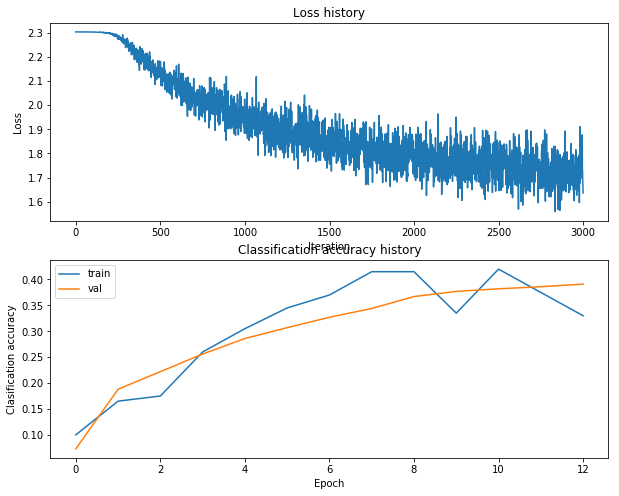

iteration 0 / 1000: loss 2.302565
iteration 100 / 1000: loss 2.045754
iteration 200 / 1000: loss 1.768760
iteration 300 / 1000: loss 1.793165
iteration 400 / 1000: loss 1.528789
iteration 500 / 1000: loss 1.543148
iteration 600 / 1000: loss 1.528685
iteration 700 / 1000: loss 1.562275
iteration 800 / 1000: loss 1.503639
iteration 900 / 1000: loss 1.508526


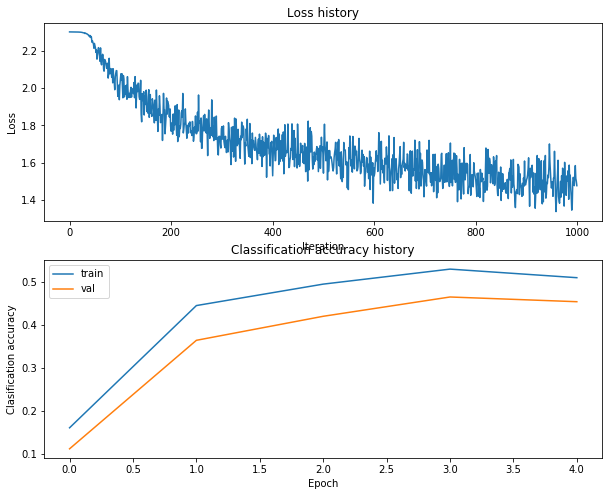

iteration 0 / 2000: loss 2.302566
iteration 100 / 2000: loss 2.041487
iteration 200 / 2000: loss 1.713537
iteration 300 / 2000: loss 1.691803
iteration 400 / 2000: loss 1.662754
iteration 500 / 2000: loss 1.664063
iteration 600 / 2000: loss 1.629581
iteration 700 / 2000: loss 1.585747
iteration 800 / 2000: loss 1.457863
iteration 900 / 2000: loss 1.505864
iteration 1000 / 2000: loss 1.562902
iteration 1100 / 2000: loss 1.396281
iteration 1200 / 2000: loss 1.447987
iteration 1300 / 2000: loss 1.338744
iteration 1400 / 2000: loss 1.473063
iteration 1500 / 2000: loss 1.367178
iteration 1600 / 2000: loss 1.458978
iteration 1700 / 2000: loss 1.373838
iteration 1800 / 2000: loss 1.446972
iteration 1900 / 2000: loss 1.423701


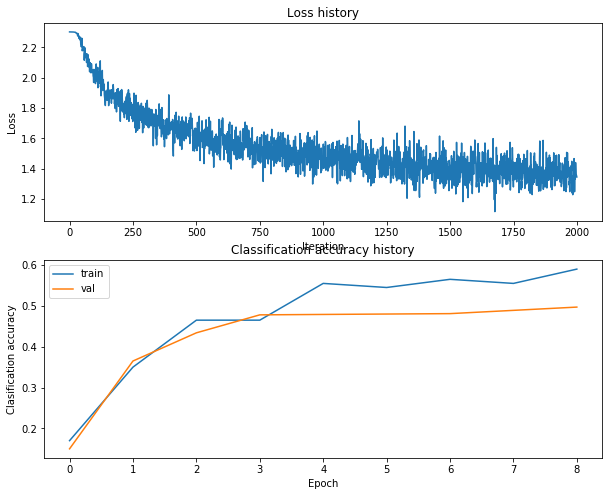

iteration 0 / 3000: loss 2.302539
iteration 100 / 3000: loss 2.025721
iteration 200 / 3000: loss 1.772600
iteration 300 / 3000: loss 1.782772
iteration 400 / 3000: loss 1.688588
iteration 500 / 3000: loss 1.493903
iteration 600 / 3000: loss 1.654849
iteration 700 / 3000: loss 1.521224
iteration 800 / 3000: loss 1.451249
iteration 900 / 3000: loss 1.380398
iteration 1000 / 3000: loss 1.498328
iteration 1100 / 3000: loss 1.423302
iteration 1200 / 3000: loss 1.553145
iteration 1300 / 3000: loss 1.308958
iteration 1400 / 3000: loss 1.317291
iteration 1500 / 3000: loss 1.425391
iteration 1600 / 3000: loss 1.320307
iteration 1700 / 3000: loss 1.469457
iteration 1800 / 3000: loss 1.226518
iteration 1900 / 3000: loss 1.348085
iteration 2000 / 3000: loss 1.360810
iteration 2100 / 3000: loss 1.365354
iteration 2200 / 3000: loss 1.241286
iteration 2300 / 3000: loss 1.246703
iteration 2400 / 3000: loss 1.309698
iteration 2500 / 3000: loss 1.362030
iteration 2600 / 3000: loss 1.306488
iteration 270

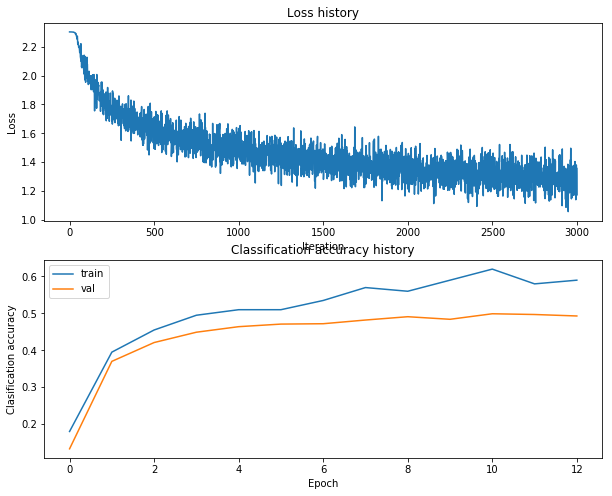

iteration 0 / 1000: loss 2.302598
iteration 100 / 1000: loss 2.008971
iteration 200 / 1000: loss 1.887555
iteration 300 / 1000: loss 1.719383
iteration 400 / 1000: loss 1.624681
iteration 500 / 1000: loss 1.659415
iteration 600 / 1000: loss 1.569861
iteration 700 / 1000: loss 1.562536
iteration 800 / 1000: loss 1.583147
iteration 900 / 1000: loss 1.440024


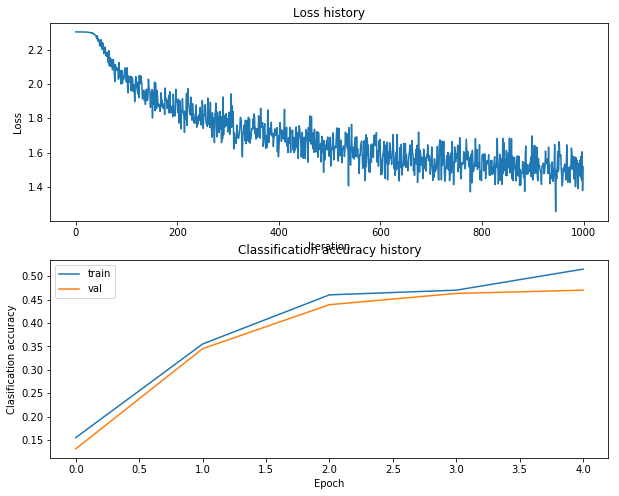

iteration 0 / 2000: loss 2.302585
iteration 100 / 2000: loss 1.976268
iteration 200 / 2000: loss 1.831061
iteration 300 / 2000: loss 1.785954
iteration 400 / 2000: loss 1.719832
iteration 500 / 2000: loss 1.581799
iteration 600 / 2000: loss 1.727416
iteration 700 / 2000: loss 1.573008
iteration 800 / 2000: loss 1.562019
iteration 900 / 2000: loss 1.537258
iteration 1000 / 2000: loss 1.572017
iteration 1100 / 2000: loss 1.470181
iteration 1200 / 2000: loss 1.443396
iteration 1300 / 2000: loss 1.520628
iteration 1400 / 2000: loss 1.379324
iteration 1500 / 2000: loss 1.356832
iteration 1600 / 2000: loss 1.320532
iteration 1700 / 2000: loss 1.402740
iteration 1800 / 2000: loss 1.345845
iteration 1900 / 2000: loss 1.358313


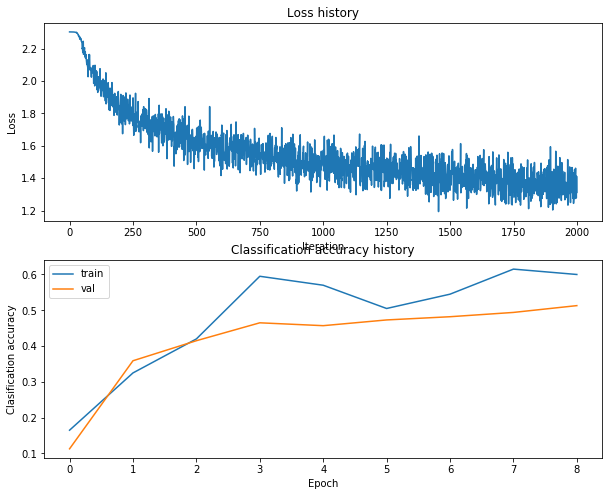

iteration 0 / 3000: loss 2.302641
iteration 100 / 3000: loss 2.017513
iteration 200 / 3000: loss 1.797248
iteration 300 / 3000: loss 1.784488
iteration 400 / 3000: loss 1.616648
iteration 500 / 3000: loss 1.742709
iteration 600 / 3000: loss 1.539904
iteration 700 / 3000: loss 1.567873
iteration 800 / 3000: loss 1.311957
iteration 900 / 3000: loss 1.427019
iteration 1000 / 3000: loss 1.436107
iteration 1100 / 3000: loss 1.478160
iteration 1200 / 3000: loss 1.439790
iteration 1300 / 3000: loss 1.530146
iteration 1400 / 3000: loss 1.415562
iteration 1500 / 3000: loss 1.329957
iteration 1600 / 3000: loss 1.359059
iteration 1700 / 3000: loss 1.418099
iteration 1800 / 3000: loss 1.440885
iteration 1900 / 3000: loss 1.325820
iteration 2000 / 3000: loss 1.284051
iteration 2100 / 3000: loss 1.219034
iteration 2200 / 3000: loss 1.273501
iteration 2300 / 3000: loss 1.301492
iteration 2400 / 3000: loss 1.381230
iteration 2500 / 3000: loss 1.134159
iteration 2600 / 3000: loss 1.359864
iteration 270

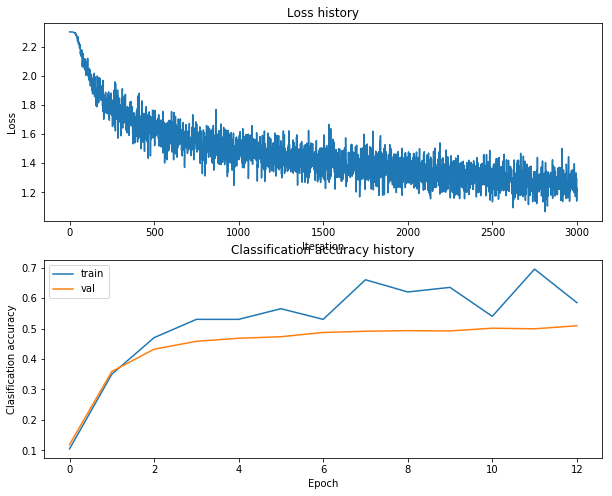

iteration 0 / 1000: loss 2.302765
iteration 100 / 1000: loss 2.000647
iteration 200 / 1000: loss 1.879446
iteration 300 / 1000: loss 1.673002
iteration 400 / 1000: loss 1.631776
iteration 500 / 1000: loss 1.638133
iteration 600 / 1000: loss 1.587002
iteration 700 / 1000: loss 1.564126
iteration 800 / 1000: loss 1.495906
iteration 900 / 1000: loss 1.616316


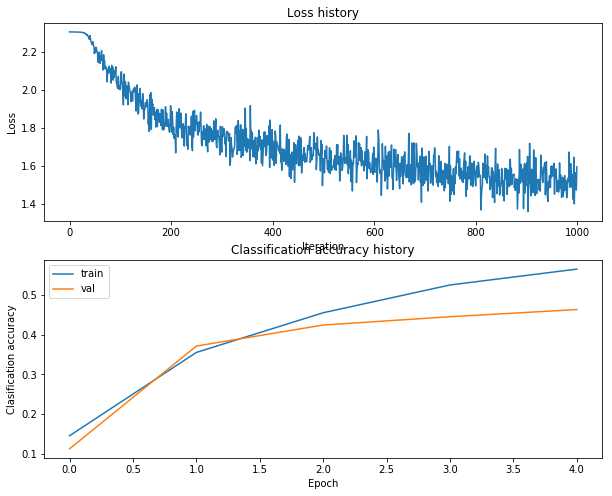

iteration 0 / 2000: loss 2.302781
iteration 100 / 2000: loss 1.985068
iteration 200 / 2000: loss 1.846546
iteration 300 / 2000: loss 1.733498
iteration 400 / 2000: loss 1.544208
iteration 500 / 2000: loss 1.621187
iteration 600 / 2000: loss 1.670671
iteration 700 / 2000: loss 1.695183
iteration 800 / 2000: loss 1.485260
iteration 900 / 2000: loss 1.526322
iteration 1000 / 2000: loss 1.541158
iteration 1100 / 2000: loss 1.506547
iteration 1200 / 2000: loss 1.551335
iteration 1300 / 2000: loss 1.411012
iteration 1400 / 2000: loss 1.397006
iteration 1500 / 2000: loss 1.301432
iteration 1600 / 2000: loss 1.516072
iteration 1700 / 2000: loss 1.332081
iteration 1800 / 2000: loss 1.356803
iteration 1900 / 2000: loss 1.422605


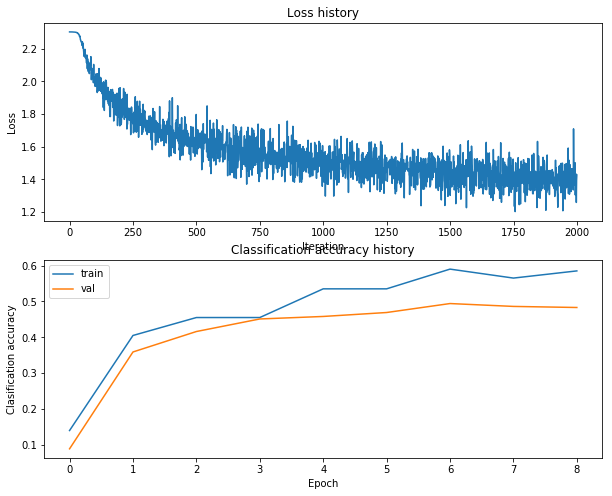

iteration 0 / 3000: loss 2.302790
iteration 100 / 3000: loss 2.015914
iteration 200 / 3000: loss 1.794130
iteration 300 / 3000: loss 1.770105
iteration 400 / 3000: loss 1.815354
iteration 500 / 3000: loss 1.550928
iteration 600 / 3000: loss 1.657169
iteration 700 / 3000: loss 1.620815
iteration 800 / 3000: loss 1.526189
iteration 900 / 3000: loss 1.594372
iteration 1000 / 3000: loss 1.516653
iteration 1100 / 3000: loss 1.579871
iteration 1200 / 3000: loss 1.558759
iteration 1300 / 3000: loss 1.553875
iteration 1400 / 3000: loss 1.527633
iteration 1500 / 3000: loss 1.554813
iteration 1600 / 3000: loss 1.458086
iteration 1700 / 3000: loss 1.412041
iteration 1800 / 3000: loss 1.464006
iteration 1900 / 3000: loss 1.599439
iteration 2000 / 3000: loss 1.399915
iteration 2100 / 3000: loss 1.500691
iteration 2200 / 3000: loss 1.333536
iteration 2300 / 3000: loss 1.424211
iteration 2400 / 3000: loss 1.288890
iteration 2500 / 3000: loss 1.302440
iteration 2600 / 3000: loss 1.385162
iteration 270

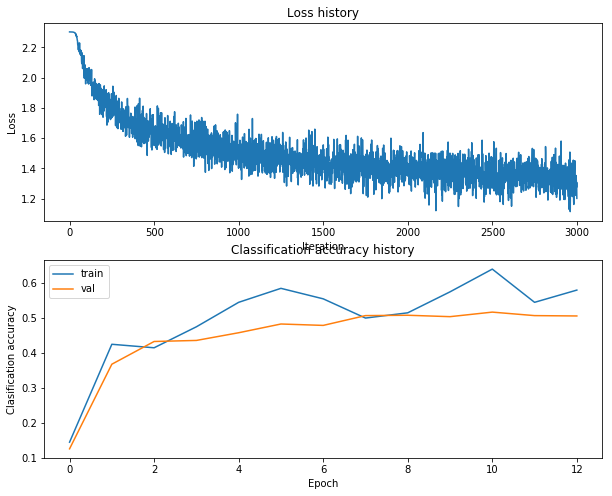

iteration 0 / 1000: loss 2.302620


/content/drive/My Drive/Classification/assignment1/cs231n/classifiers/neural_net.py:102: RuntimeWarning: divide by zero encountered in log
  loss = -1 * np.sum(np.log(soft_max[np.arange(N), y]))
/content/drive/My Drive/Classification/assignment1/cs231n/classifiers/neural_net.py:100: RuntimeWarning: overflow encountered in exp
  soft_max = np.exp(scores)
/content/drive/My Drive/Classification/assignment1/cs231n/classifiers/neural_net.py:101: RuntimeWarning: overflow encountered in exp
  soft_max /= np.sum(np.exp(scores), axis = 1).reshape(N,1)
/content/drive/My Drive/Classification/assignment1/cs231n/classifiers/neural_net.py:101: RuntimeWarning: invalid value encountered in divide
  soft_max /= np.sum(np.exp(scores), axis = 1).reshape(N,1)
/content/drive/My Drive/Classification/assignment1/cs231n/classifiers/neural_net.py:120: RuntimeWarning: invalid value encountered in less_equal
  da1[a1 <= 0] = 0


iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan


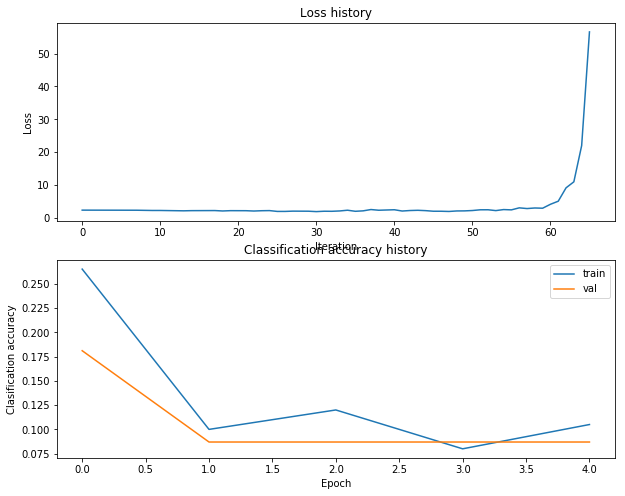

iteration 0 / 2000: loss 2.302574
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan


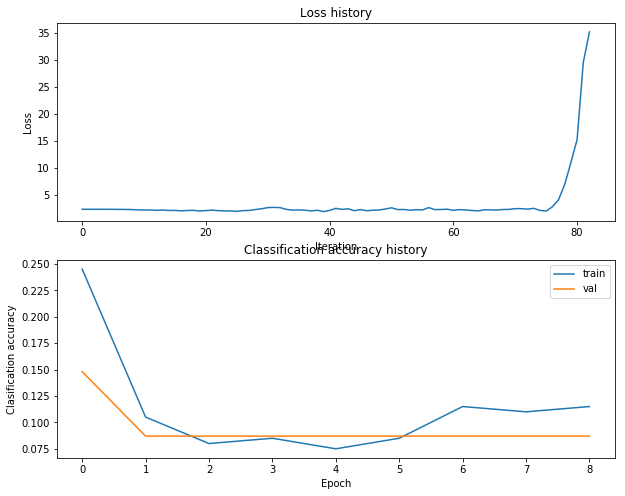

iteration 0 / 3000: loss 2.302579
iteration 100 / 3000: loss nan
iteration 200 / 3000: loss nan
iteration 300 / 3000: loss nan
iteration 400 / 3000: loss nan
iteration 500 / 3000: loss nan
iteration 600 / 3000: loss nan
iteration 700 / 3000: loss nan
iteration 800 / 3000: loss nan
iteration 900 / 3000: loss nan
iteration 1000 / 3000: loss nan
iteration 1100 / 3000: loss nan
iteration 1200 / 3000: loss nan
iteration 1300 / 3000: loss nan
iteration 1400 / 3000: loss nan
iteration 1500 / 3000: loss nan
iteration 1600 / 3000: loss nan
iteration 1700 / 3000: loss nan
iteration 1800 / 3000: loss nan
iteration 1900 / 3000: loss nan
iteration 2000 / 3000: loss nan
iteration 2100 / 3000: loss nan
iteration 2200 / 3000: loss nan
iteration 2300 / 3000: loss nan
iteration 2400 / 3000: loss nan
iteration 2500 / 3000: loss nan
iteration 2600 / 3000: loss nan
iteration 2700 / 3000: loss nan
iteration 2800 / 3000: loss nan
iteration 2900 / 3000: loss nan


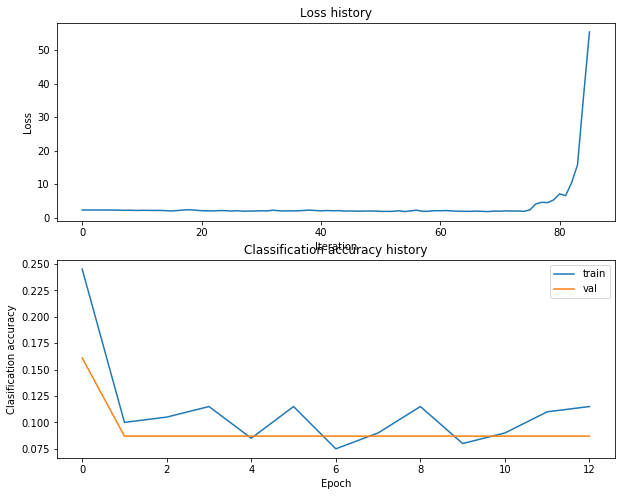

iteration 0 / 1000: loss 2.302585
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan


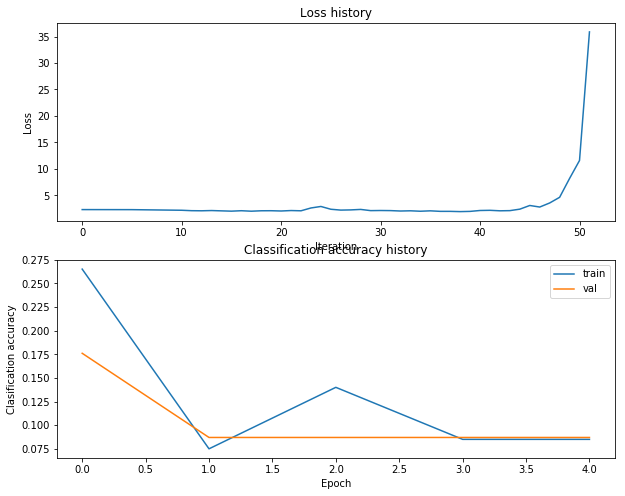

iteration 0 / 2000: loss 2.302578
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan


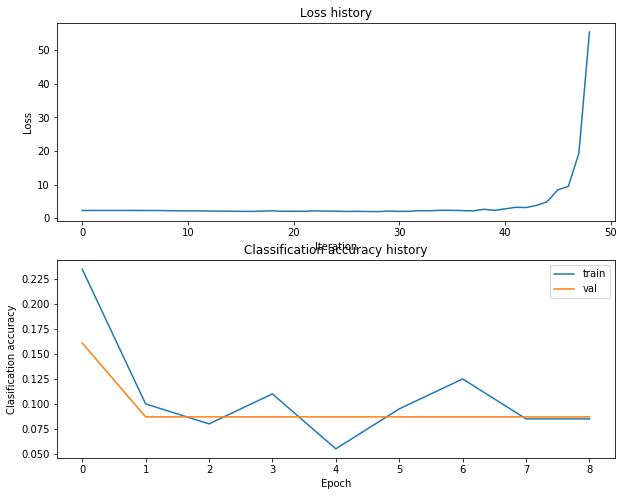

iteration 0 / 3000: loss 2.302611
iteration 100 / 3000: loss nan
iteration 200 / 3000: loss nan
iteration 300 / 3000: loss nan
iteration 400 / 3000: loss nan
iteration 500 / 3000: loss nan
iteration 600 / 3000: loss nan
iteration 700 / 3000: loss nan
iteration 800 / 3000: loss nan
iteration 900 / 3000: loss nan
iteration 1000 / 3000: loss nan
iteration 1100 / 3000: loss nan
iteration 1200 / 3000: loss nan
iteration 1300 / 3000: loss nan
iteration 1400 / 3000: loss nan
iteration 1500 / 3000: loss nan
iteration 1600 / 3000: loss nan
iteration 1700 / 3000: loss nan
iteration 1800 / 3000: loss nan
iteration 1900 / 3000: loss nan
iteration 2000 / 3000: loss nan
iteration 2100 / 3000: loss nan
iteration 2200 / 3000: loss nan
iteration 2300 / 3000: loss nan
iteration 2400 / 3000: loss nan
iteration 2500 / 3000: loss nan
iteration 2600 / 3000: loss nan
iteration 2700 / 3000: loss nan
iteration 2800 / 3000: loss nan
iteration 2900 / 3000: loss nan


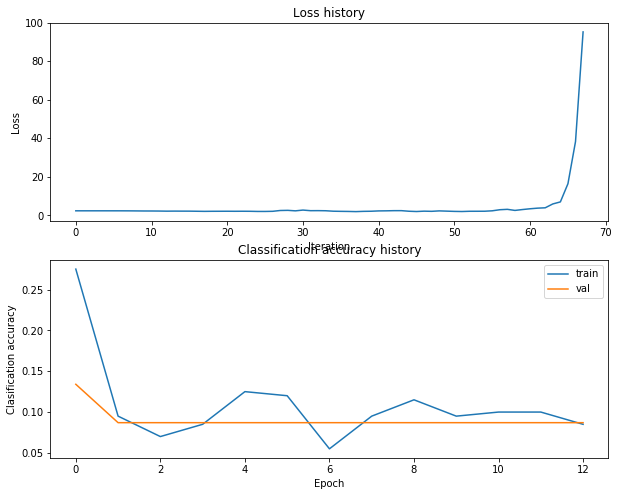

iteration 0 / 1000: loss 2.302818
iteration 100 / 1000: loss 2.304544
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan


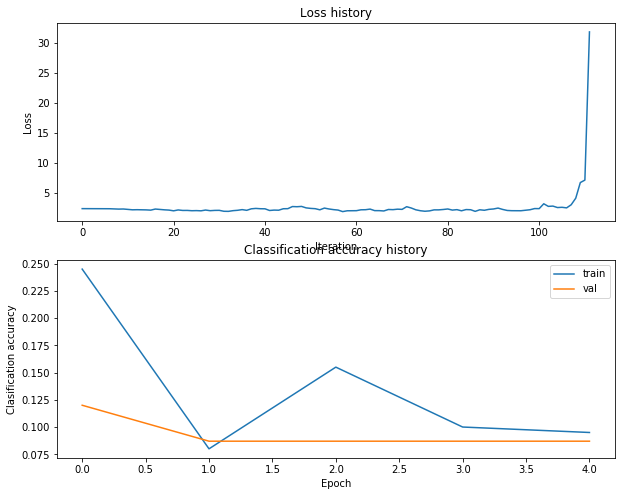

iteration 0 / 2000: loss 2.302784
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan


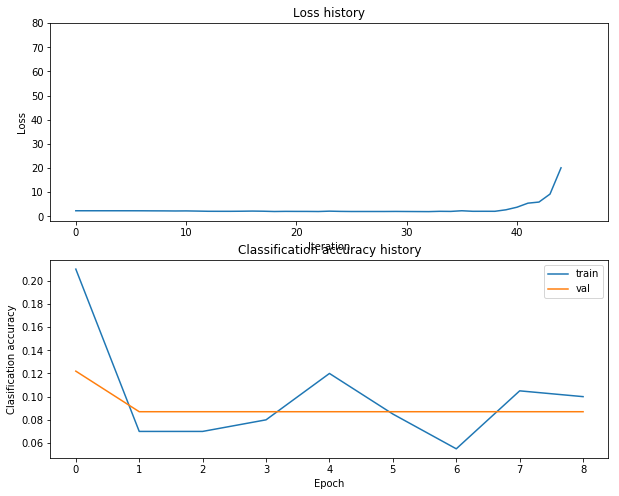

iteration 0 / 3000: loss 2.302810
iteration 100 / 3000: loss nan
iteration 200 / 3000: loss nan
iteration 300 / 3000: loss nan
iteration 400 / 3000: loss nan
iteration 500 / 3000: loss nan
iteration 600 / 3000: loss nan
iteration 700 / 3000: loss nan
iteration 800 / 3000: loss nan
iteration 900 / 3000: loss nan
iteration 1000 / 3000: loss nan
iteration 1100 / 3000: loss nan
iteration 1200 / 3000: loss nan
iteration 1300 / 3000: loss nan
iteration 1400 / 3000: loss nan
iteration 1500 / 3000: loss nan
iteration 1600 / 3000: loss nan
iteration 1700 / 3000: loss nan
iteration 1800 / 3000: loss nan
iteration 1900 / 3000: loss nan
iteration 2000 / 3000: loss nan
iteration 2100 / 3000: loss nan
iteration 2200 / 3000: loss nan
iteration 2300 / 3000: loss nan
iteration 2400 / 3000: loss nan
iteration 2500 / 3000: loss nan
iteration 2600 / 3000: loss nan
iteration 2700 / 3000: loss nan
iteration 2800 / 3000: loss nan
iteration 2900 / 3000: loss nan


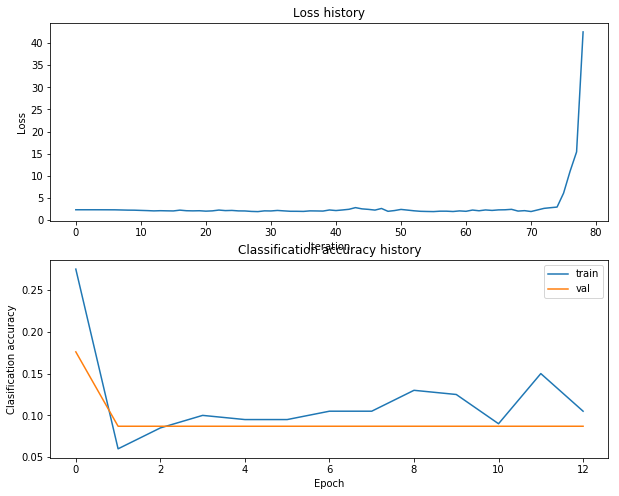

Validation accuracy:  0.517


In [14]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
best_ValAcc = 0
best_parameters = {}
my_learningRate = np.array([1e-4, 7e-4, 5e-3])
my_reg = np.array([0.001, 0.01, 0.1])
my_iters = np.array([1000, 2000, 3000])
hyper_parameters = [(a, b, c) for a in my_learningRate 
                   for b in my_reg for c in my_iters]
input_size = 32 * 32 * 3
num_classes = 10
learning_rate_decay = 0.95
for rate, reg, iter in hyper_parameters:
  net = TwoLayerNet(input_size, 64, num_classes)
  # Train the network
  stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=iter, batch_size=200,
            learning_rate=rate, learning_rate_decay=learning_rate_decay,
            reg=reg, verbose=True)
  #Plot the loss function and train / validation accuracies
  plt.subplot(2, 1, 1)
  plt.plot(stats['loss_history'])
  plt.title('Loss history')
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
   
  plt.subplot(2, 1, 2)
  plt.plot(stats['train_acc_history'], label='train')
  plt.plot(stats['val_acc_history'], label='val')
  plt.title('Classification accuracy history')
  plt.xlabel('Epoch')
  plt.ylabel('Clasification accuracy')
  plt.legend()
  plt.show()
  # Predict on the validation set
  val_acc = (net.predict(X_val) == y_val).mean()
  if (val_acc > best_ValAcc):
    best_ValAcc = val_acc
    best_net = net
    best_parameters[(rate, reg, iter)] = stats
print('Validation accuracy: ', best_ValAcc)
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

In [15]:
print("Best hyperparameters:",best_parameters)
print('Validation accuracy: ', best_ValAcc)

Best hyperparameters: {(0.0001, 0.001, 3000): {'train_acc_history': [0.145, 0.16, 0.26, 0.225, 0.315, 0.315, 0.34, 0.37, 0.35, 0.34, 0.37, 0.345, 0.365], 'loss_history': [2.3025492650277317, 2.3025675852745593, 2.3025888241415773, 2.30257516349174, 2.3025772155215103, 2.302555907530485, 2.302535711188738, 2.302559517060211, 2.3025619156998265, 2.3025647340536084, 2.3025664355457955, 2.3025263831907887, 2.3025480053734406, 2.3025735878031424, 2.3025392075668667, 2.3025295850956593, 2.3025117725890576, 2.302496989377742, 2.3025265902963334, 2.3025232963989235, 2.3025031233911366, 2.3025327025685307, 2.302514566977607, 2.3024914406512114, 2.302525261240704, 2.302490517609038, 2.3024792209289853, 2.3025154056762926, 2.302487974838449, 2.302491649146121, 2.3025138175247175, 2.3024903724403547, 2.302472328849139, 2.3025024238380873, 2.302455188790683, 2.30246064461562, 2.3024411700918352, 2.3024237411063435, 2.302471174317746, 2.3024186213872198, 2.302425990921921, 2.3023770182837113, 2.3024

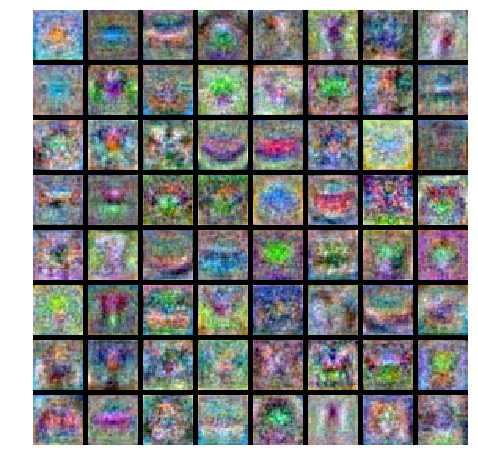

In [16]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [17]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.495


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*: 1 & 3

*Your explanation:* as increasing dataset it makes the model to learn on more examples and for that we usually do the data augmenation if the dataset is small, increasing hidden units may lead to overfitting so it will not decrease gap, increase regularization strength will reduce overfitting as it aslo reduce loss.